# Búsqueda Local Solución

<b><i style="font-size:13px">Tags: </i></b><i style="font-size:11px">Búsqueda Local, Heurística, Variable Continua</i>

## Prerrequisitos:

- Ver video [búsqueda local](https://youtu.be/hj4BCI5GKRg)
- Ver video introducción a Python: [funciones](https://youtu.be/Su6774vaOLY)
- Ver video introducción a Python: [estructuras de control](https://youtu.be/rJCF6dkeG5g)

## Objetivos:

Implementar en un algorítmo de búsqueda local.

## Implementación búsqueda local

En el script `BusquedaLocal.py` hay una implementación para un algoritmo de búsqueda local. Esta implementación consiste principalmente de una función (`busquedaLocal()`) que realiza la búsqueda local para un problema que le entra por parámetro. Además de esto, a la función también le debemos pasar por parámetro el radar con el que vamos a hacer la búsqueda local, y el punto inicial de la búsqueda. A continuación vamos a ver como funciona esta implementación, y mas detalladamente que es cada uno de los argumentos que le debemos pasar a la función `busquedaLocal()` para haga la búsqueda local correctamente. Lo primero que debemos hacer es importar el script:

In [1]:
from optimizacion.Soluciones.BusquedaLocal import *

**Nota:** Recuerde, puede usar la función `help()` para consultar la documentación de cada una de las funciones del módulo (`help(busquedaLocal)`).

La función `busquedaLocal()` recibe cinco argumentos:

1. `f` : Una función de Python que retorna el valor de la función objetivo dado un punto $(x_1,x_2)$
2. `restricciones`: Una lista de Python con las restricciones del modelo en un formato específico
3. `radar`: Una función de Python que dado un punto $(x_1,x_2)$ y un radio (d), retorna una lista con los puntos en el radar
4. `x0`: Una tupla de Python con el punto inicial de la búsqueda
5. `d0`: El radio del radar de búsqueda

Veamos entonces como construir cada argumento para el problema de la empresa 2Crudos inc. que hemos visto. Recordemos, la formulación del problema es la siguiente:

$$
\begin{equation}\label{eq:fo}
\min \  20x_1+15x_2
\end{equation}
$$

Sujeto a,

$$
\begin{align}
0.3x_1+0.4x_2&\ge 2000;\label{eq:c1}\\
0.4x_1+0.2x_2&\ge 1500;\label{eq:c2}\\
0.2x_1+0.3x_2&\ge 500;\label{eq:c3}\\
x_1 &\le 9000;\label{eq:c4}\\
x_2&\le 6000;\label{eq:c5}\\
x_1 &\ge 0;\label{eq:c6}\\
x_2&\ge 0.\label{eq:c7}\\
\end{align}
$$

### 1. Argumento `f`

El argumento `f` es una función de Python que retorna el valor de la función objetivo dado un punto $(x_1,x_2)$. Es decir debemos declarar una función que dados unos puntos $(x_1,x_2)$, retorne $20x_1+15x_2$. Esto lo hacemos de la siguiente forma:

In [2]:
#Función que retorna el valor de la función objetivo, para un punto (x1,x2)
def f(x1,x2):
    return 20*x1+15*x2

Veamos que hace la función que definimos:

In [3]:
x1,x2=6000,3500
print(f"El valor de la función objetivo en el punto {x1},{x2} es {f(x1,x2)}")

El valor de la función objetivo en el punto 6000,3500 es 172500


### 2. Argumento `restricciones`

El argumento `restricciones` es una lista de Python con las restricciones del modelo. La forma en la que debemos pasar las restricciones del modelo es también como funciones, pero en este caso son funciones que retornan un valor booleano. Es decir retornan `True` si el punto $(x_1,x_2)$ cumple con la restricción, y retornan `False` de lo contrario. Veamos entonces como declarar estas funciones para cada una de las restricciones del modelo:

Consideremos entonces la siguiente restricción:

$$
\begin{equation*}
0.3x_1+0.4x_2\ge 2000;
\end{equation*}
$$

Para definir una función que, dado un punto $(x_1,x_2)$, retorna `True` si el punto cumple con la restricción, y `False` de lo contrario hacemos lo siguiente:

In [4]:
def R1(x1,x2):
    return 0.3*x1+0.4*x2>=2000

Veamos que hace la función que declaramos:

In [5]:
x1,x2=1000,6000
print(f"R1({x1},{x2}) retorna: {R1(x1,x2)}")

R1(1000,6000) retorna: True


De la misma forma definimos una función booleana por cada restricción del modelo de la siguiente forma:

In [6]:
#Función booleana para la restricción (3)
def R2(x1,x2):    
    return 0.4*x1+0.2*x2>=1500

#Función booleana para la restricción (4)
def R3(x1,x2):
    return 0.2*x1+0.3*x2>=500

#Función booleana para la restricción (5)
def R4(x1,x2):
    return x1<=9000

#Función booleana para la restricción (6)
def R5(x1,x2):
    return x2<=6000

#Función booleana para la restricción (7)
def R6(x1,x2):
    return x1>=0

#Función booleana para la restricción (8)
def R7(x1,x2):
    return x2>=0

Ahora, como el argumento `restricciones` es una lista de estas funciones, pues lo único que debemos hacer es almacenar todas estas funciones en una lista de Python. Esto lo hacemos de la siguiente forma:

In [7]:
restricciones=[R1,R2,R3,R4,R5,R6,R7]

### 3. Argumento `radar`

El argumento `radar` es una función de Python que dado un punto $(x_1,x_2)$ y un radio (`d`), retorna una lista con los puntos en el radar. En el script `BusquedaLocal.py` que importamos al principio del notebook hay una implementación de esta función. En la función `miRadar(x,d)` esta implementada para un radar circular de 8 puntos, como el que se muestra en la siguiente figura.

![miRadar](img/Radar.png)

Veamos entonces la documentación de esta función:

In [8]:
help(miRadar)

Help on function miRadar in module BusquedaLocal:

miRadar(x, d, n=8)
    Se usa la ecuación paramétrica del circulo para crear un radar circular. 
    Puede consultar el siguiente link para mas información sobre esta ecuación:
    http://jwilson.coe.uga.edu/EMAT6680Fa05/Schultz/Assignment10/Parametric_Circles#:~:text=In%20parametric%20equations%2C%20each%20variable,0%2C%202*pi%5D).&text=At%20t%3D0%2C%20x%20%3D,or%20(1%2C%200) 
    
    ROUTINE:
            miRadar(x,d)
    PURPOSE:
            Crear los puntos en el radar de búsqueda.       
    
    ARGUMENTS:
            x (tuple): Punto central del radar.
            d (float): Radio del radar de búsqueda.
    
    RETURN VALUE:
            Una lista con los puntos en el radar.
    
    EXAMPLE:
            puntosRadar = radar((0,0),1)



### 4. Argumento `x0`

El argumento `x0` hace referencia al punto factible en el que se inicia la búsqueda. Este argumento es un tupla de Python, es decir para declararlo debemos poner las coordenadas del punto entre paréntesis. En este caso, tomemos como punto inicial el punto $(9000,6000)$ que sabemos que es un punto factible.

In [9]:
x0=(9000,6000)

### 5. Argumento `d`

Finalmente, el argumento `d`, de tipo `float`, hace referencia al radio de búsqueda, es decir, la distancia a los puntos que evalúa la exploración en cada iteración. Para este ejemplo tomemos `d=500`.

In [10]:
d0=500

### 6. Llamar la función

Ya teniendo claros todos los argumentos de la función `busquedaLocal()`, debemos únicamente llamarla, con los argumentos que acabamos de crear, para correr el procedimiento de búsqueda local para nuestro problema. En la siguiente celda de código se corre la función `busquedaLocal()` que retorna el valor de las variables de decisión del mejor punto que encontró. Este valor lo guardamos en la variable `xStar`.

In [11]:
xStar=busquedaLocal(f,restricciones,miRadar,x0,d0)

Ahora para ver el valor de las variables de decisión a los que llega nuestro procedimiento, podemos usar la función `print()` de Python.

In [12]:
print(f"El valor de las variables de decisión es {xStar}")

El valor de las variables de decisión es (1989.5923599143498, 3525.126265847085)


Para ver el costo que tiene esta solución, es decir el valor en la función objetivo, podemos usar la función `f()` que declaramos, pasándole como argumento las componentes de `xStar`.

In [13]:
x1Star,x2Star=xStar
print(f"El costo total de esta solución es de ${f(x1Star,x2Star)}")

El costo total de esta solución es de $92668.74118599328


Si quisiéramos verificar que el punto que obtuvimos cumple con todas nuestras restricciones, podemos usar también las funciones booleanas que declaramos para hacer esta verificación:

In [14]:
for i,r in enumerate(restricciones):
    print(f"La evaluación de R{i+1} es: {r(x1Star,x2Star)}")

La evaluación de R1 es: True
La evaluación de R2 es: True
La evaluación de R3 es: True
La evaluación de R4 es: True
La evaluación de R5 es: True
La evaluación de R6 es: True
La evaluación de R7 es: True


Como podemos ver, nuestro punto `xStar` cumple con todas las restricciones.

### 7. Representación gráfica del procedimiento

El script `BusquedaLocal.py` que importamos al principio del notebook, también tiene una función que corre el procedimiento de búsqueda local, y además grafica lo que se hizo en cada iteración. Esta función se llama `busquedaLocalGrafica()` y tiene lo mismos argumentos de `busquedaLocal()`, mas el de `xlim` y `ylim`, estos últimos son argumentos para crear la gráfica únicamente, y representan los límites de la misma. Esta función genera dos gráficas: la primera gráfica muestra la región factible del problema, con las curvas de nivel (isóclinas) de la función objetivo, y la trayectoria que sigue el procedimiento de búsqueda local; la segunda gráfica muestra como se comporta el valor de la función objetivo contra las iteraciones del método.

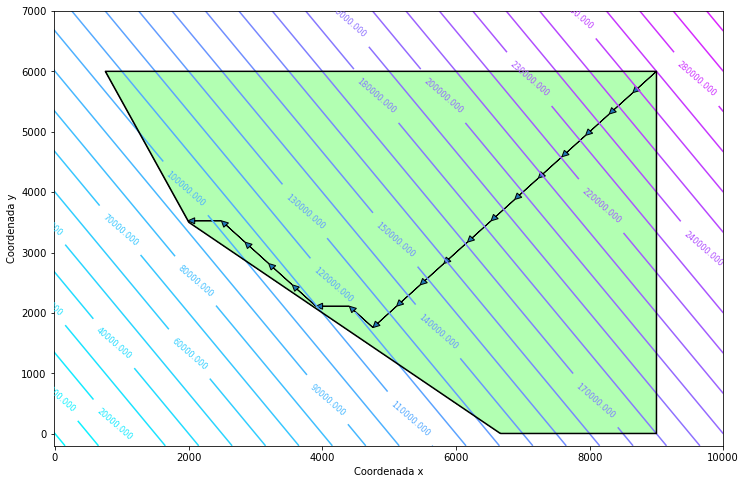

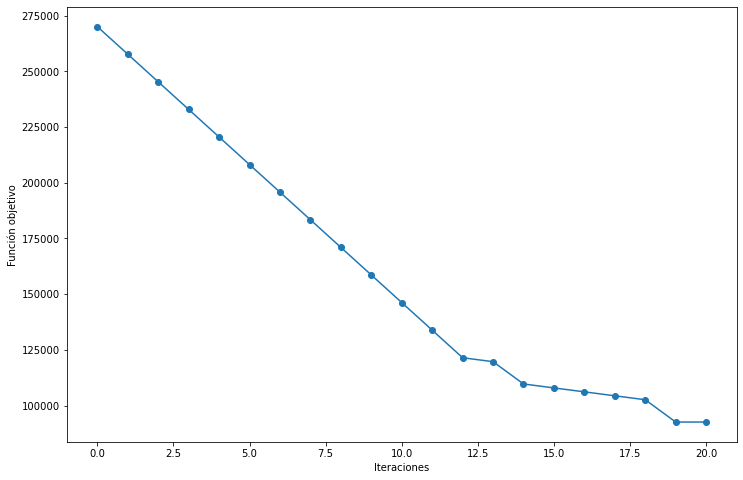

In [15]:
busquedaLocalGrafica(f,restricciones,miRadar,x0,d0,xlim=[-20,10000],ylim=[-200,7000])

### 8. Modelo no lineal

Recuerde que con el método de búsqueda local podemos atacar problemas con restricciones y funciones objetivo no lineales. Consideremos entonces el siguiente modelo de optimización:

$$
\begin{equation*}
\text{minimizar }  \sin{(x_1^2)}-(x_2-3)^2
\end{equation*}
$$

Sujeto a,

$$
\begin{align*}
\frac{x_1^2}{2}-x_2&\le 2;\\
-x_1++x_2&\le 4.
\end{align*}
$$

In [2]:
from numpy import log,sin,cos

-19.314549033193508


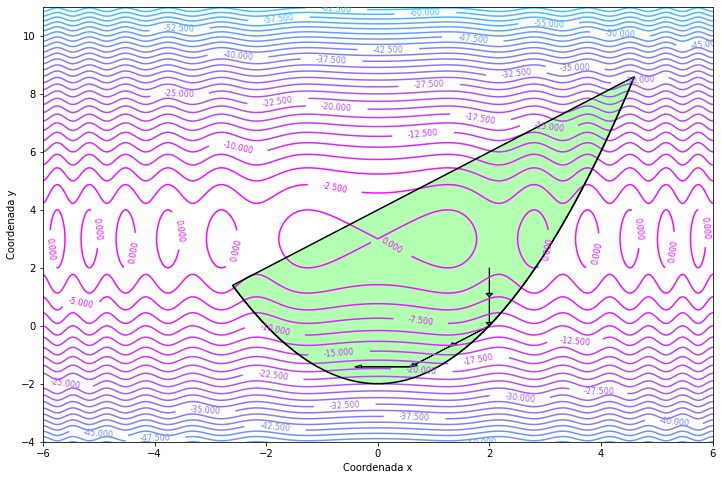

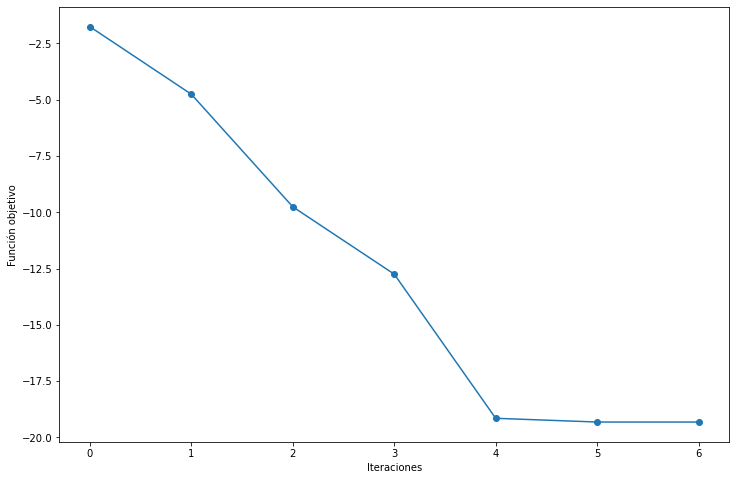

In [3]:
f = lambda x1,x2: sin(x1**2) -(x2-3)**2 #Se define la función Objetivo. No tiene que ser con una lambda function

R1 = lambda x1,x2 : (x1**2)/2-x2<=2
R2 = lambda x1,x2 : -x1+x2<=4
restricciones=[R1,R2]

x0=(2,2)
d0=1
print(f(*busquedaLocal(f,restricciones,miRadar,x0,d0)))
busquedaLocalGrafica(f,restricciones,miRadar,x0,d0,xlim=[-6,6],ylim=[-4,11])

## Ejercicio

Cree su propio radar de búsqueda, que reciba como paráetro un punto $x \in \mathbb{R}^{2}$ y un radio $d$ y genere los siguientes puntos:

![miRadar](img/suRadar.png)

En la siguiente celda de código implemente la función `suRadar(x,d)`:

In [4]:
#Implemente su función de radar
def suRadar(x,d):
    '''    
    ROUTINE:
        SuRadar(x,d)
    PURPOSE:
        Crear los puntos en el radar de búsqueda. 

    ARGUMENTS:
        x (tuple): Punto central del radar.
        d (float): Radio del radar de búsqueda.
    RETURN VALUE:
        Una lista con los puntos en el radar.
    EXAMPLE:
        puntosRadar = radar((0,0),1)
    '''
    #Escriba a partir de esta linea su código
    n = 4 #Generaremos 4 puntos para el radar
    angulos = [i / n * 2 * pi for i in range(n)] #Los puntos existen a angulos fijos entre sí
    puntos = [(x[0] + d * cos(a), x[1] + d * sin(a)) for a in angulos] #Los puntos son una proyección en los ejes de la distancia
    return puntos

Corra la función `busquedaLocal()` con su función `suRadar()` y compare los resultados obtenidos con el radar `miRadar()`.

## Bono 1

Modifique la función `suBusquedaLocal_dist()` para que reduzca el radio del radar cuando no encuentre puntos mejores con el radio actual. Compare los resultados, ¿Mejora el valor de la función objetivo con este cambio?

*Nota*: Note que en este caso deberá cambiar la condición de parada.

In [40]:
def suBusquedaLocal_dist(f, restricciones, radar, x0, d0, umbralD):
    '''
    Corre un algorítmo sencillo de búsqueda local.	

    ROUTINE:
        busquedaLocal(f,restricciones,radar,x0)
    PURPOSE:
        Encontrar un punto (x1,x2) que mejore el valor de la función objetivo f,
        cumpliendo con todas las restricciones.

    ARGUMENTS:
        f (function): Función objetivo a minimizar.
        restricciones (list): Lista de funciones booleanas que evaluan factibilidad del punto x.
        radar (function): Función que dado un punto central y un radio del radar,
        retorna los puntos en el radar de búsqueda.
        x0 (tuple): Punto donde se inicia la búsqueda local.
        d0 (float): Radio del radar de búsqueda.
        umbralD (float): Mínima distancia del radar.

    RETURN VALUE:
        Punto factible (x1,x2) con mejor función objetivo encontrado.

    EXAMPLE:
        xStar = suBusquedaLocal_dist(f,restricciones,radar,x0,d0)
    '''
    xStar = x0                                                    # Inicializamos la distancia y el mejor punto conocido
    d = d0                                                        
    while d >= umbralD:                                           # Mientras la distancia no sea demasiado pequeña, seguimos buscando
        algunFactible = False                                     # Suponemos que aún no existen puntos factibles a una distancia d
        nextX = None                                              # Inicializamos el siguiente pivote en vacio
        for x in radar(xStar, d):                                 # Evaluar para cada punto en el radar actual
            if f(*x) < f(*xStar):                                 # Si el punto mejora la FO y es factible, guardarlo y dejar de buscar sobre este radar
                factible = True
                for r in restricciones:
                    if not r(*x):
                        factible = False
                        break
                if factible:
                    algunFactible = True
                    nextX = x
                    break
        if algunFactible:                                         # Si algún punto en el radar fue factible
            xStar = suBusquedaLocal_dist(f, restricciones,
                                         radar, nextX, d, umbralD)# Actualizar el mejor punto conocido de forma recursiva sobre el pivote hallado
        else:
            d /= 2                                                # Si no hubo puntos factibles, buscar en un radio menor
    return xStar                                                  # Se retorna el mejor punto encontrado

In [41]:
#Use esta celda de código para llamar su modificción a la función.
x1, x2 = suBusquedaLocal_dist(f, restricciones, suRadar, x0, d0, 0.005)
f(x1, x2)

-24.995722414902477

En efecto, el resultado de buscar y reducir la distancia si no se hallan puntos factibles en el radar es más cercano a un óptimo local y global que al solo buscar a distancias fijas.

## Bono 2

Cree la función `suBusquedaLocal_recur()` con el mismo comportamiento de `busquedaLocal()` de forma que se propague en cada punto del radar recursivamente y halle el mejor punto de la región factible. Compare los resultados, ¿Mejora el valor de la función objetivo con este cambio?

*Nota*: Deberá cambiar la condición de parada de forma que no se repita la recursión indefinidamente.

In [5]:
def suBusquedaLocal_recur(f, restricciones, radar, x0, d0, k, depth = 0):
    '''
    Corre un algorítmo sencillo de búsqueda local que reduce el radio de busqueda.

    ROUTINE:
        busquedaLocal(f,restricciones,radar,x0)
    PURPOSE:
        Encontrar un punto (x1,x2) que mejore el valor de la función objetivo f,
        cumpliendo con todas las restricciones.

    ARGUMENTS:
        f (function): Función objetivo a minimizar.
        restricciones (list): Lista de funciones booleanas que evaluan factibilidad del punto x.
        radar (function): Función que dado un punto central y un radio del radar,
        retorna los puntos en el radar de búsqueda.
        x0 (tuple): Punto donde se inicia la búsqueda local.
        d0 (float): Radio del radar de búsqueda.
        k (integer): Máxima recursión alcanzada.
        depth (integer): Profundidad del nodo a explorar. Inicialmente 0.

    RETURN VALUE:
        Punto factible (x1,x2) con mejor función objetivo encontrado.

    EXAMPLE:
        xStar = suBusquedaLocal_recur(f,restricciones,radar,x0,d0)
    '''
    xStar = x0
    fStar = f(x0[0],x0[1])
    candidatos = radar(xStar, d0)
    incumbentes = [xStar]
    if depth < k:
        for x in candidatos:
            factible = True
            for r in restricciones:
                if not r(x[0], x[1]):
                    factible = False
                    break
            if factible:
                x_incumbente = suBusquedaLocal_recur(f, restricciones, radar, x, d0, k, depth + 1)
                incumbentes.append(x_incumbente)

        for i in range(len(incumbentes)):
            if f(incumbentes[i][0], incumbentes[i][1]) < fStar:
                xStar = incumbentes[i]
                fStar = f(incumbentes[i][0], incumbentes[i][1])
            
    return xStar

In [6]:
#Use esta celda de código para llamar su modificción a la función.
x1, x2 = suBusquedaLocal_recur(f, restricciones, suRadar, x0, d0, 7)
f(x1, x2)

-25.0

En efecto, el resultado de buscar y llamar recursivamente sobre todos los puntos del radar es más cercano a un óptimo local y global que al solo buscar a distancias fijas.

## Créditos

Equipo de Optimización<br>
Autor: David Corredor y Jorge Huertas<br>
Edición: Alfaima Solano y Alejandro Mantilla<br>
Fecha: 25/06/2020